 1. Install Required Libraries

In [137]:
pip install kagglehub pandas matplotlib scikit-learn


2. Download and Load Dataset from KaggleHub

In [138]:
import kagglehub
import pandas as pd

# Download dataset from Kaggle
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

# Load CSV (usually named "StudentsPerformance.csv")
file_path = f"{path}/StudentsPerformance.csv"
df = pd.read_csv(file_path)

# Preview the dataset
print(df.head())


Path to dataset files: /kaggle/input/students-performance-in-exams
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


3. Calculate Average Score and Simulate Study Hours

In [139]:
# Calculate average exam score (or pick just 'math score')
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Simulate "study hours" — since dataset has no such column
# You can simulate hours or use a correlated factor (like 'test preparation course')
import numpy as np

# Simulate study hours: students who completed preparation studied more
df['study_hours'] = np.where(df['test preparation course'] == 'completed',
                              np.random.uniform(4, 8, len(df)),
                              np.random.uniform(0.5, 4, len(df)))

# Check cleaned data
print(df[['study_hours', 'average_score']].head())


   study_hours  average_score
0     1.174434      72.666667
1     7.045567      82.333333
2     0.770772      92.666667
3     1.119022      49.333333
4     1.320738      76.333333


4. Visualize Study Hours vs Exam Score

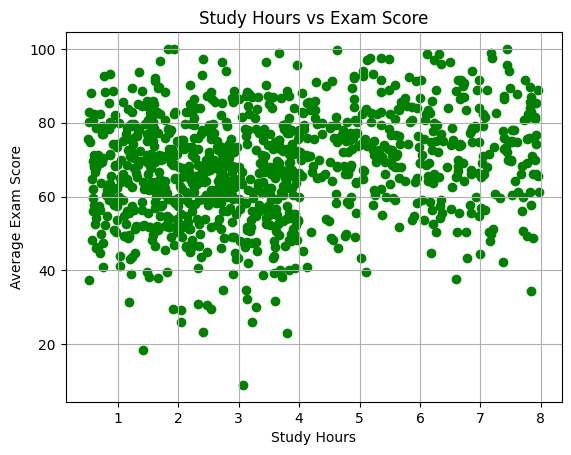

In [140]:
import matplotlib.pyplot as plt

plt.scatter(df['study_hours'], df['average_score'], color='green')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Average Exam Score')
plt.grid(True)
plt.show()


5. Prepare Data for Training (Feature & Target Split)

In [141]:
from sklearn.model_selection import train_test_split

X = df[['study_hours']]
y = df['average_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 6.  Train Linear Regression Model

In [142]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

7. Predict on Test Set

In [143]:
y_pred = model.predict(X_test)


8. Visualize Actual vs Predicted Scores

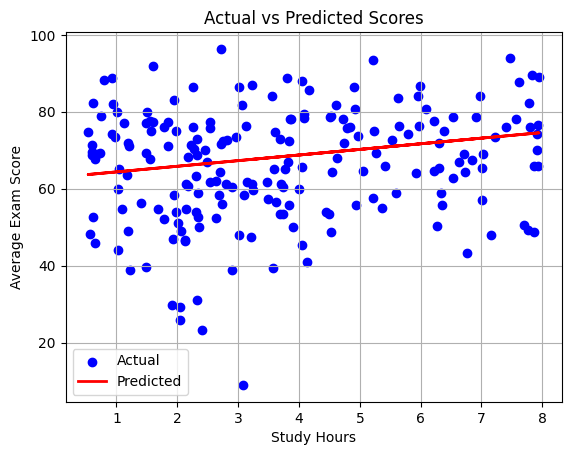

In [144]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Study Hours')
plt.ylabel('Average Exam Score')
plt.legend()
plt.grid(True)
plt.show()


9. Evaluate Model Performance (MSE & R²)

In [145]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 213.38
R² Score: 0.00


10. Predict Score for Custom Study Hours

In [146]:
hours = [[6.5]]
predicted_score = model.predict(hours)
print(f"Predicted Score for 6.5 study hours: {predicted_score[0]:.2f}")


Predicted Score for 6.5 study hours: 72.41


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


11. Install Streamlit and Ngrok

In [147]:
!pip install streamlit pyngrok kagglehub --quiet


12. Authenticate Ngrok

In [148]:
!ngrok config add-authtoken AUTH_TOKEN_HERE


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


13. Stop Previous Streamlit/Ngrok Processes

In [149]:
!pkill streamlit
!pkill ngrok


14. Re-download Dataset for Streamlit App

In [150]:
!pip install kagglehub --quiet
import kagglehub

# Download dataset
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("📁 Dataset files are stored at:", path)


📁 Dataset files are stored at: /kaggle/input/students-performance-in-exams


15. Train Model and Encode Features (Standalone Script)

In [151]:
import pandas as pd
import streamlit as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

# Encode categorical columns
categorical_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Split features and target
X = df.drop("math score", axis=1)
y = df["math score"]

# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

16. Build Streamlit App for Score Prediction

In [152]:
%%writefile student_score_app.py
import pandas as pd
import streamlit as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# -----------------------------
# Load dataset
@st.cache_data
def load_data():
    df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
    return df

df = load_data()
st.title("📊 Student Performance Prediction App")
st.write(df)

# -----------------------------
# Prepare model and encoders
@st.cache_resource
def train_model(df):
    categorical_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
    encoders = {}
    df_encoded = df.copy()

    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])
        encoders[col] = le

    X = df_encoded.drop("math score", axis=1)
    y = df_encoded["math score"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    return model, encoders, X.columns

model, encoders, feature_columns = train_model(df)

# -----------------------------
# Score Prediction Form
st.subheader("🎯 Predict Math Score")

with st.form("prediction_form"):
    gender = st.selectbox("Gender", encoders["gender"].classes_)
    race = st.selectbox("Race/Ethnicity", encoders["race/ethnicity"].classes_)
    parent_edu = st.selectbox("Parental Level of Education", encoders["parental level of education"].classes_)
    lunch = st.selectbox("Lunch", encoders["lunch"].classes_)
    test_prep = st.selectbox("Test Preparation Course", encoders["test preparation course"].classes_)
    reading_score = st.slider("Reading Score", 0, 100, 50)
    writing_score = st.slider("Writing Score", 0, 100, 50)

    submit = st.form_submit_button("Predict")

    if submit:
        input_data = pd.DataFrame([[
            encoders["gender"].transform([gender])[0],
            encoders["race/ethnicity"].transform([race])[0],
            encoders["parental level of education"].transform([parent_edu])[0],
            encoders["lunch"].transform([lunch])[0],
            encoders["test preparation course"].transform([test_prep])[0],
            reading_score,
            writing_score
        ]], columns=feature_columns)

        prediction = model.predict(input_data)[0]
        st.success(f"📈 Predicted Math Score: **{prediction:.2f}**")


Overwriting student_score_app.py


17. Launch Streamlit App in Background

In [154]:
!streamlit run student_score_app.py &>/content/log.txt &


18. Generate Public URL via Ngrok

In [155]:
from pyngrok import ngrok
import time
time.sleep(5)
public_url = ngrok.connect(8501)
print("🌐 Your Streamlit app is live at:", public_url)


🌐 Your Streamlit app is live at: NgrokTunnel: "https://31bbc5608619.ngrok-free.app" -> "http://localhost:8501"
